## Activity: Titanic Survival Predictions Interpretation using Shap Values

In [49]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

1. Load the Titanic dataset into your Python environment. (use train then test)

In [7]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")
data = pd.concat([df1, df2], axis=0)

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


2. Perform necessary data preprocessing steps, including handling missing values and encoding categorical variables.

In [11]:
data=data.dropna()

In [12]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1.0
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1.0


In [14]:
data.Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7',
       'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49',
       'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16',
       'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49',
       'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8',
       'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', 'D6', 'B

In [15]:
data.Ticket.unique()

array(['PC 17599', '113803', '17463', 'PP 9549', '113783', '248698',
       '113788', '19950', 'PC 17572', '113509', '36973', 'C.A. 29395',
       '348123', 'W.E.P. 5734', 'PC 17754', 'PC 17759', '35281', '110465',
       'PC 17558', '27267', '11752', 'PC 17593', '230080', '113776',
       '111240', '17764', 'PC 17595', '230136', 'PC 17610', 'PC 17569',
       '347054', '112277', '35273', '11813', '19943', '19928', '11751',
       '113514', '110152', '110413', '112059', 'PC 17582', 'PC 17760',
       'PC 17596', '13502', '11967', 'SC/Paris 2163', '113781',
       'PC 17758', 'PC 17485', '11767', 'PC 17608', '36928', '16966',
       '28551', '111361', '113043', '113784', '248733', '113505',
       '110813', 'PC 17477', '11765', '113503', '113760',
       'SOTON/O.Q. 392078', '110564', '13507', '33638', '113786',
       '113051', '17453', '13509', '19952', '111320', 'SC/AH Basle 541',
       '11771', '113787', '36947', 'PC 17473', '36967', 'C.A. 34260',
       '12749', '113050', '13568',

In [16]:
data.Sex.unique()

array(['female', 'male'], dtype=object)

In [30]:
data.Embarked.unique()

array(['C', 'S', 'Q'], dtype=object)

In [24]:
label_mappingC = {label: idx for idx, label in enumerate(data.Cabin.unique())}

In [25]:
data['Cabin'] = data['Cabin'].map(label_mappingC)

In [26]:
label_mappingT = {label: idx for idx, label in enumerate(data.Ticket.unique())}

In [27]:
data['Ticket'] = data['Ticket'].map(label_mappingT)

In [28]:
data['Sex']=data['Sex'].map({'female': 0, 'male': 1})

In [31]:
data['Embarked']=data['Embarked'].map({'C': 0, 'S': 1, 'Q': 1})

In [33]:
data=data.drop("Name", axis=1)

In [34]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,1,0,38.0,1,0,0,71.2833,0,0,1.0
3,4,1,0,35.0,1,0,1,53.1000,1,1,1.0
6,7,1,1,54.0,0,0,2,51.8625,2,1,0.0
10,11,3,0,4.0,1,1,3,16.7000,3,1,1.0
11,12,1,0,58.0,0,0,4,26.5500,4,1,1.0


In [44]:
x=data.drop("Survived", axis=1)
y=data['Survived']

In [45]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,0,71.2833,0,0
3,4,1,0,35.0,1,0,1,53.1000,1,1
6,7,1,1,54.0,0,0,2,51.8625,2,1
10,11,3,0,4.0,1,1,3,16.7000,3,1
11,12,1,0,58.0,0,0,4,26.5500,4,1
...,...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,36,52.5542,35,1
872,873,1,1,33.0,0,0,124,5.0000,103,1
879,880,1,0,56.0,0,1,50,83.1583,130,0
887,888,1,0,19.0,0,0,125,30.0000,131,1


In [46]:
y

1      1.0
3      1.0
6      0.0
10     1.0
11     1.0
      ... 
871    1.0
872    0.0
879    1.0
887    1.0
889    1.0
Name: Survived, Length: 183, dtype: float64

3. Choose a machine learning model and train it on the preprocessed Titanic dataset.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = GaussianNB()

In [59]:
model.fit(x_train, y_train)

GaussianNB()

4. Calculate Shap values for the trained model using the SHAP library. 

In [60]:
explainer = shap.Explainer(model.predict, x_test)
shap_values = explainer(x_test)

5. Select a specific instance (index) from the dataset for interpretation and explain how Shap values help in interpreting the prediction for that instance.

In [ ]:
My instance will be Gender, and based on the summary plot and the fact that I mapped 0 to be female and 1 to be male index value wise means that 
looking at the shap values will determine which gender is more likely to survive another Titanic incident

6. Visualize the Shap values for the selected instance and interpret the plot, highlighting feature contributions. 

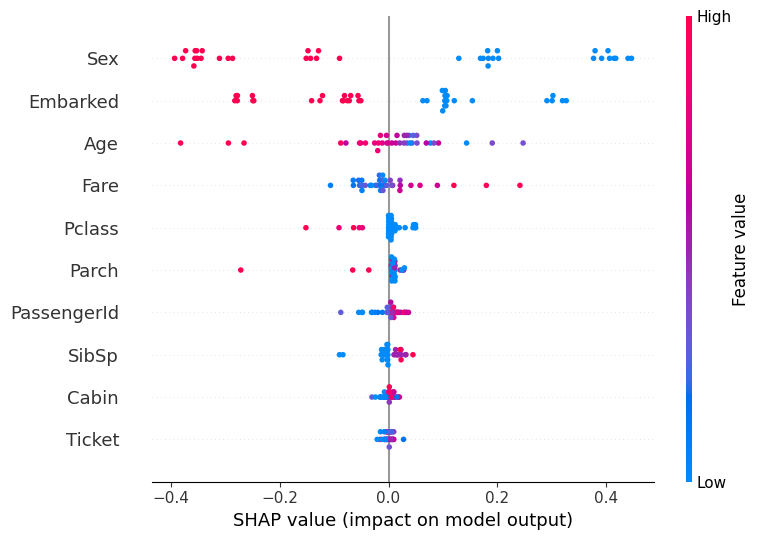

In [62]:
shap.summary_plot(shap_values, x_test)

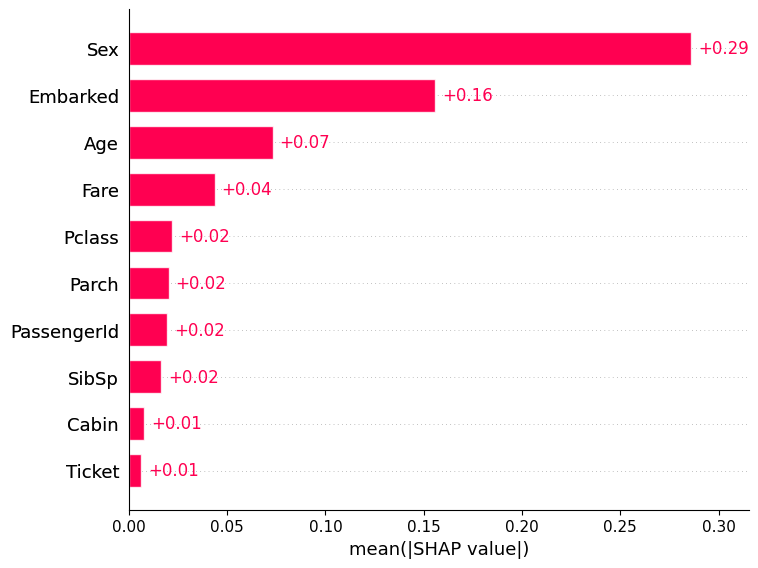

In [63]:
shap.plots.bar(shap_values)

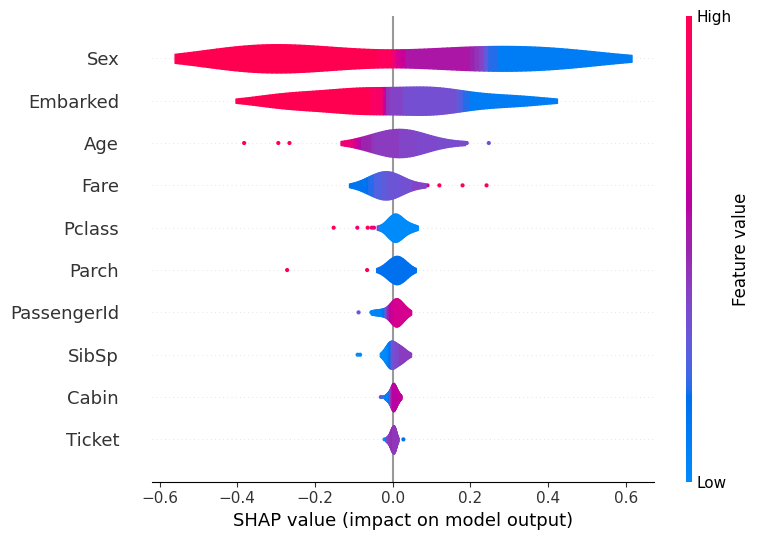

In [64]:
shap.summary_plot(shap_values, plot_type='violin')

7. Summarize the significance of Shap values in interpreting machine learning models' predictions, particularly in the context of the Titanic survival predictions.


In [ ]:
I believe especially in the context of the Titanic survival predictions, it allows one to know the reasoning behind the predictions
and the factors that significantly affect the outcome of the survival prediction